In [80]:
##Importamos librerias 

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [81]:
df = pd.read_csv("../Data/data_limpia_1.csv", index_col=0)

df.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
4,no,non travel,unknown,technical degree,F,sales executive,no,no,46,3,3,5,1,4,4,1,12783.92,33238.20,2,12,3,4,1,5,3,19,2,8,153407.04


In [82]:
df.shape


(1614, 29)

## Exploración por columnas: 

### ATTRITION VS SATISFACTION

Hipótesis: "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".

In [85]:
#Dividimos a los empleados según nivel de satisfacción: 
grupo_a= df[df['jobsatisfaction'] >= 3]
grupo_b = df[df['jobsatisfaction'] < 3]

In [86]:
grupo_a.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
5,no,non travel,research & development,medical,F,manager,no,yes,48,22,3,6,1,3,4,4,14311.67,37210.33,3,11,3,2,1,3,3,22,4,7,171740.04


In [87]:
grupo_a["attrition"].value_counts()

attrition
no     859
yes    136
Name: count, dtype: int64

In [88]:
## 1: Chequeamos tasa de abandono de ambos grupos: 

abandono_grupo_a = {"grupo": ["Abandono","Empleados actuales"], "valores": [136,859]}
df_abandono_grupo_a = pd.DataFrame(abandono_grupo_a)
df_abandono_grupo_a

,grupo,valores
0,Abandono,136
1,Empleados actuales,859


In [89]:
grupo_b['attrition'].value_counts()

attrition
no     496
yes    123
Name: count, dtype: int64

In [90]:
abandono_grupo_b = {"grupo": ["Abandono","Empleados actuales"], "valores": [123,496]}
df_abandono_grupo_b = pd.DataFrame(abandono_grupo_b)
df_abandono_grupo_b

,grupo,valores
0,Abandono,123
1,Empleados actuales,496


In [91]:
# Cálculo de la tasa de rotación

# Tasa de attrition en grupo A
df_grupoa_attrition = grupo_a[grupo_a["attrition"] == "yes"]
tasa_attrition_grupoa = round(df_grupoa_attrition.shape[0] / grupo_a.shape[0],2)
print(f"la tasa de attrition del grupo A es: {tasa_attrition_grupoa}")

# Tasa de attrition en grupo B
df_grupob_attrition = grupo_b[grupo_b["attrition"] == "yes"]
tasa_attrition_grupob = round(df_grupob_attrition.shape[0] / grupo_b.shape[0],2)
print(f"la tasa de attrition del grupo B es: {tasa_attrition_grupob}")

la tasa de attrition del grupo A es: 0.14
la tasa de attrition del grupo B es: 0.2


#### Gráfico 1: tasa de rotacion por grupos

/tmp/ipykernel_14776/1484129141.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Grupo A", "Grupo B"], y=[tasa_attrition_grupoa, tasa_attrition_grupob], palette=custom_palette)
/tmp/ipykernel_14776/1484129141.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=["Grupo A", "Grupo B"], y=[tasa_attrition_grupoa, tasa_attrition_grupob], palette=custom_palette)


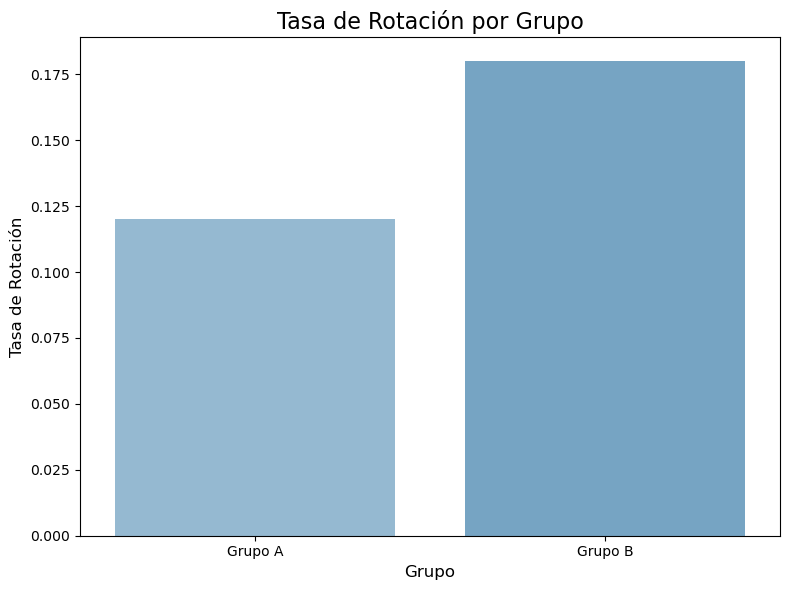

In [193]:

# Suponiendo que ya tienes el DataFrame con las tasas de rotación por grupo

# Definir paleta de colores azul o violeta
custom_palette = sns.color_palette("Blues_d")  # O también "Purples_d" para tonos morados

# Crear gráfico de barras con los colores personalizados
plt.figure(figsize=(8, 6))
sns.barplot(x=["Grupo A", "Grupo B"], y=[tasa_attrition_grupoa, tasa_attrition_grupob], palette=custom_palette)

# Añadir título y etiquetas
plt.title("Tasa de Rotación por Grupo", fontsize=16)
plt.xlabel("Grupo", fontsize=12)
plt.ylabel("Tasa de Rotación", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()


In [ ]:
Interpretación de los resultados:
Cuando tienes los resultados como en el ejemplo:

##Tasa de rotación del Grupo A = 0.12 (o 12%)
##Tasa de rotación del Grupo B = 0.18 (o 18%)
##Esto significa que el Grupo A tiene una tasa de rotación del 12%, lo que indica que el 12% de los empleados de ese grupo dejaron la empresa durante el periodo de tiempo que estás analizando.
##Por otro lado, el Grupo B tiene una tasa de rotación del 18%, lo que indica que el 18% de los empleados de ese grupo dejaron la empresa en el mismo periodo.
##¿Qué implican estas tasas?
##Grupo A con una tasa de 12%: Esta es una tasa de rotación relativamente baja. Puede ser un buen signo de estabilidad en ese grupo. Es posible que los empleados de este grupo se sientan más satisfechos con su trabajo, o las condiciones laborales en este grupo sean mejores, lo que lleva a menos rotación.
##Grupo B con una tasa de 18%: Esta es una tasa más alta, lo que podría indicar un mayor nivel de insatisfacción o problemas dentro de ese grupo, lo que puede llevar a más rotación de empleados. 

In [92]:

# Número de empleados que abandonaron y no abandonaron en Grupo A
abandono_a = df_grupoa_attrition.shape[0]  # Empleados que abandonaron
no_abandono_a = grupo_a[grupo_a["attrition"] == "no"].shape[0]  # Empleados que no abandonaron

# Número de empleados que abandonaron y no abandonaron en Grupo B
abandono_b = df_grupob_attrition.shape[0]  # Empleados que abandonaron
no_abandono_b = grupo_b[grupo_b["attrition"] == "no"].shape[0]  # Empleados que no abandonaron

In [93]:
##    3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B. 

In [94]:
# Crear tabla de contingencia con los valores absolutos
contingency_table = [
    [abandono_a, no_abandono_a],  # Grupo A: Abandonaron, No Abandonaron
    [abandono_b, no_abandono_b]   # Grupo B: Abandonaron, No Abandonaron
]

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("")
    print("Hay una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("")
    print("""Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas")

0.0012322848438575645

Hay una diferencia significativa en la tasa de rotación de ambos grupos.

Los resultados sugieren que si que existe una diferencia entre los grupos 
          


#### Gráfico: relacion entre rotacion y satisfaccion

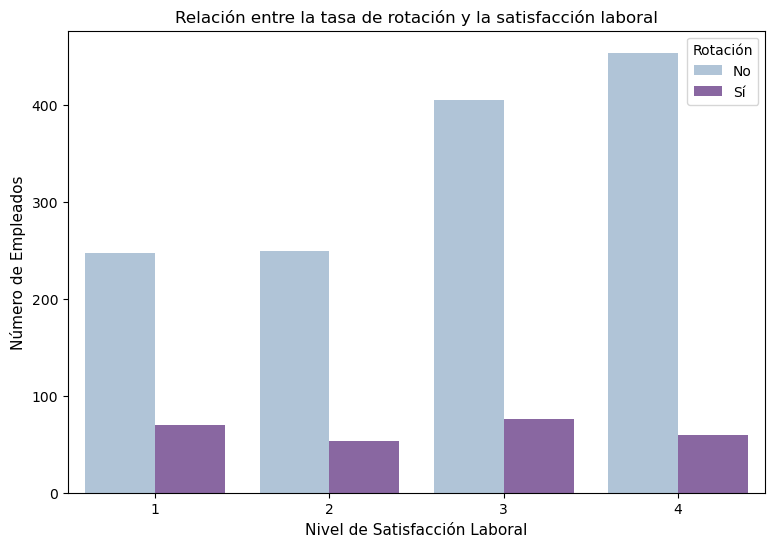

In [ ]:

# Gráfico de barras
plt.figure(figsize=(9, 6))
sns.countplot(x="jobsatisfaction", hue="attrition", data=df, dodge=True, palette="BuPu")

# Añadir título y etiquetas
plt.title("Relación entre la tasa de rotación y la satisfacción laboral", fontsize=12)
plt.xlabel("Nivel de Satisfacción Laboral", fontsize=11)
plt.ylabel("Número de Empleados", fontsize=11)

# Añadir leyenda
plt.legend(title="Rotación", labels=["No", "Sí"])  # Personaliza los labels si es necesario


In [ ]:
## Hay una diferencia significativa en la tasa de rotación del grupo de empleados que seleccionaron un grado de satisfacción mayor a 3 vs los que eligieron un número menor a 3. 

#### Gráfico: relacion entre rotacion y satisfaccion 

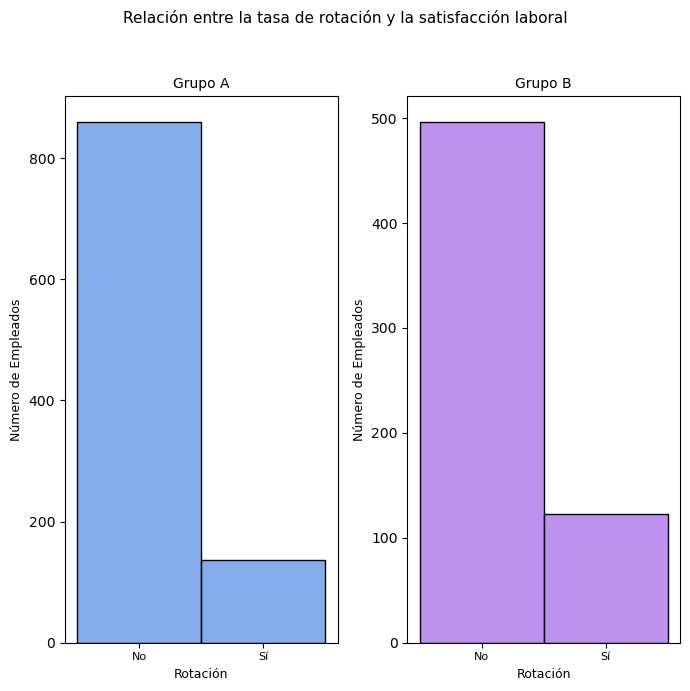

In [ ]:

# Crear figura con ejes (ajustando el tamaño a cuadrado)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))  # Ajustado a un tamaño cuadrado

# Gráfico para el grupo A
sns.histplot(x="attrition", data=grupo_a, color="#5B92E5", ax=axes[0]) 
axes[0].set_title("Grupo A", fontsize=10)  # Títulos más pequeños
axes[0].set_xlabel("Rotación", fontsize=9)  # Etiquetas más pequeñas
axes[0].set_ylabel("Número de Empleados", fontsize=9)
axes[0].set_xticks([0, 1])  # Si las etiquetas están codificadas como 0 y 1
axes[0].set_xticklabels(["No", "Sí"], fontsize=8)  # Tamaño más pequeño para las etiquetas

# Gráfico para el grupo B
sns.histplot(x="attrition", data=grupo_b, color="#A76DE9", ax=axes[1])
axes[1].set_title("Grupo B", fontsize=10)  # Títulos más pequeños
axes[1].set_xlabel("Rotación", fontsize=9)  # Etiquetas más pequeñas
axes[1].set_ylabel("Número de Empleados", fontsize=9)
axes[1].set_xticks([0, 1])  # Si las etiquetas están codificadas como 0 y 1
axes[1].set_xticklabels(["No", "Sí"], fontsize=8)  # Tamaño más pequeño para las etiquetas

# Título general de la figura
fig.suptitle("Relación entre la tasa de rotación y la satisfacción laboral", fontsize=11)

# Ajustar diseño para que se vea bien el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar márgenes para que el título no se sobreponga
plt.show()


In [ ]:
## Analisis: el primer gráfico es para el grupo A (empleados con mayor nivel de satisfacción) 
# y el eje X representa si han rotado o no. En el segundo gráfico se hace el mismo análisis para el grupo B (empleados con menor nivel de satisfacción)

In [ ]:
## Analisis de los grados de satisfacción  del empleado en relación con su entorno de trabajo y el nivel de satisfacción en las relaciones interpersonales del empleado.

#### Gráfico: tipos de satisfaccion

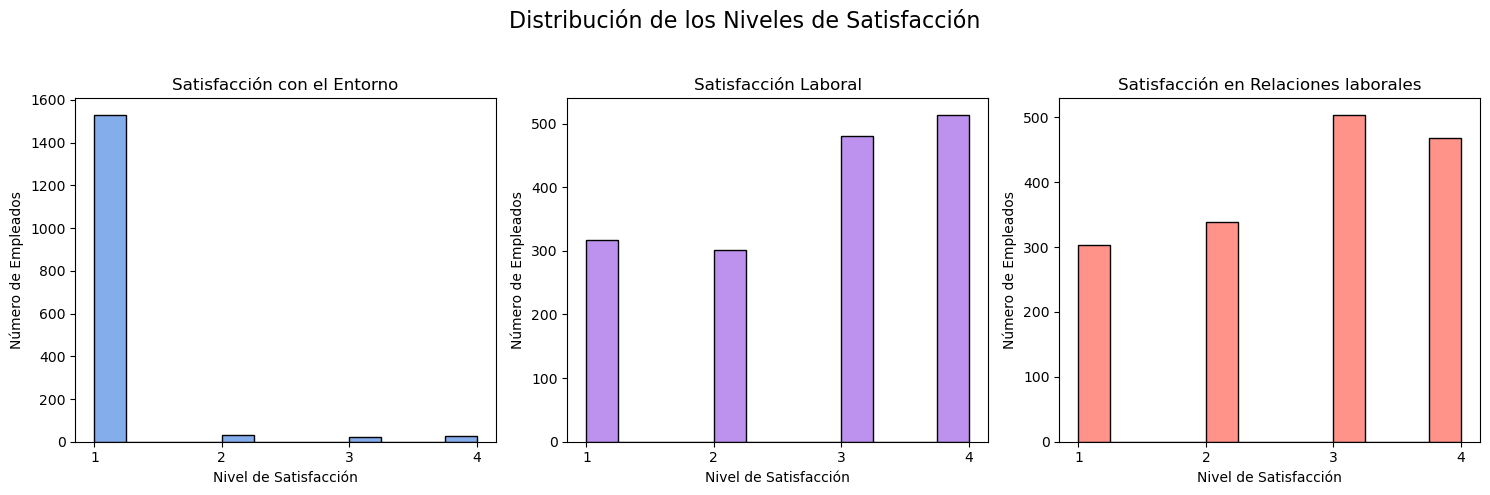

In [136]:
# Configuración del grid de subplots (3 columnas para 3 variables)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico para `environmentsatisfaction`
sns.histplot(data=df, x="environmentsatisfaction", kde=False, color="#5B92E5", ax=axes[0])
axes[0].set_title("Satisfacción con el Entorno", fontsize=12)
axes[0].set_xlabel("Nivel de Satisfacción", fontsize=10)
axes[0].set_ylabel("Número de Empleados", fontsize=10)
axes[0].set_xticks(range(int(df["environmentsatisfaction"].min()), int(df["environmentsatisfaction"].max()) + 1))  # Mostrar solo enteros

# Gráfico para `jobsatisfaction`
sns.histplot(data=df, x="jobsatisfaction", kde=False, color="#A76DE9", ax=axes[1])
axes[1].set_title("Satisfacción Laboral", fontsize=12)
axes[1].set_xlabel("Nivel de Satisfacción", fontsize=10)
axes[1].set_ylabel("Número de Empleados", fontsize=10)
axes[1].set_xticks(range(int(df["jobsatisfaction"].min()), int(df["jobsatisfaction"].max()) + 1))  # Mostrar solo enteros

# Gráfico para `relationshipsatisfaction`
sns.histplot(data=df, x="relationshipsatisfaction", kde=False, color="#FF6F61", ax=axes[2])
axes[2].set_title("Satisfacción en Relaciones laborales", fontsize=12)
axes[2].set_xlabel("Nivel de Satisfacción", fontsize=10)
axes[2].set_ylabel("Número de Empleados", fontsize=10)
axes[2].set_xticks(range(int(df["relationshipsatisfaction"].min()), int(df["relationshipsatisfaction"].max()) + 1))  # Mostrar solo enteros

# Título general
fig.suptitle("Distribución de los Niveles de Satisfacción", fontsize=16)

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
## Analizamos el nivel de satisfacción del empleado con su entorno, su trabajo y las relaciones laborales. De las tres categorias, el único caso en el que 
##  existe una relación entre el nivel de satisfacción y la rotación de empleados es en el caso del nivel de satisfacción con el empleo. Para los casos del nivel de satisfacción con el entorno 
## y las relaciones laborales, no hay relacion significativa entre los grupos A y B. 

In [190]:
df

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
4,no,non travel,unknown,technical degree,F,sales executive,no,no,46,3,3,5,1,4,4,1,12783.92,33238.20,2,12,3,4,1,5,3,19,2,8,153407.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,yes,travel rarely,unknown,life sciences,M,sales executive,NaN,no,36,3,1,1610,1,2,3,4,8604.17,22370.83,1,11,3,1,1,6,3,16,3,7,103250.00
1610,no,non travel,unknown,unknown,M,laboratory technician,NaN,yes,45,4,2,1611,1,3,2,2,3705.83,9635.17,1,12,3,2,0,5,2,9,0,8,44470.00
1611,no,travel rarely,unknown,unknown,M,sales executive,no,yes,39,13,5,1612,1,4,3,3,8339.32,21682.23,0,18,3,4,0,3,3,8,0,7,100071.84
1612,no,non travel,unknown,technical degree,M,sales executive,no,yes,36,8,4,1613,1,3,2,4,4492.84,11681.39,4,13,3,4,2,3,3,7,0,7,53914.11


### SALARY VS SATISFACTION

/tmp/ipykernel_14776/3468892715.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


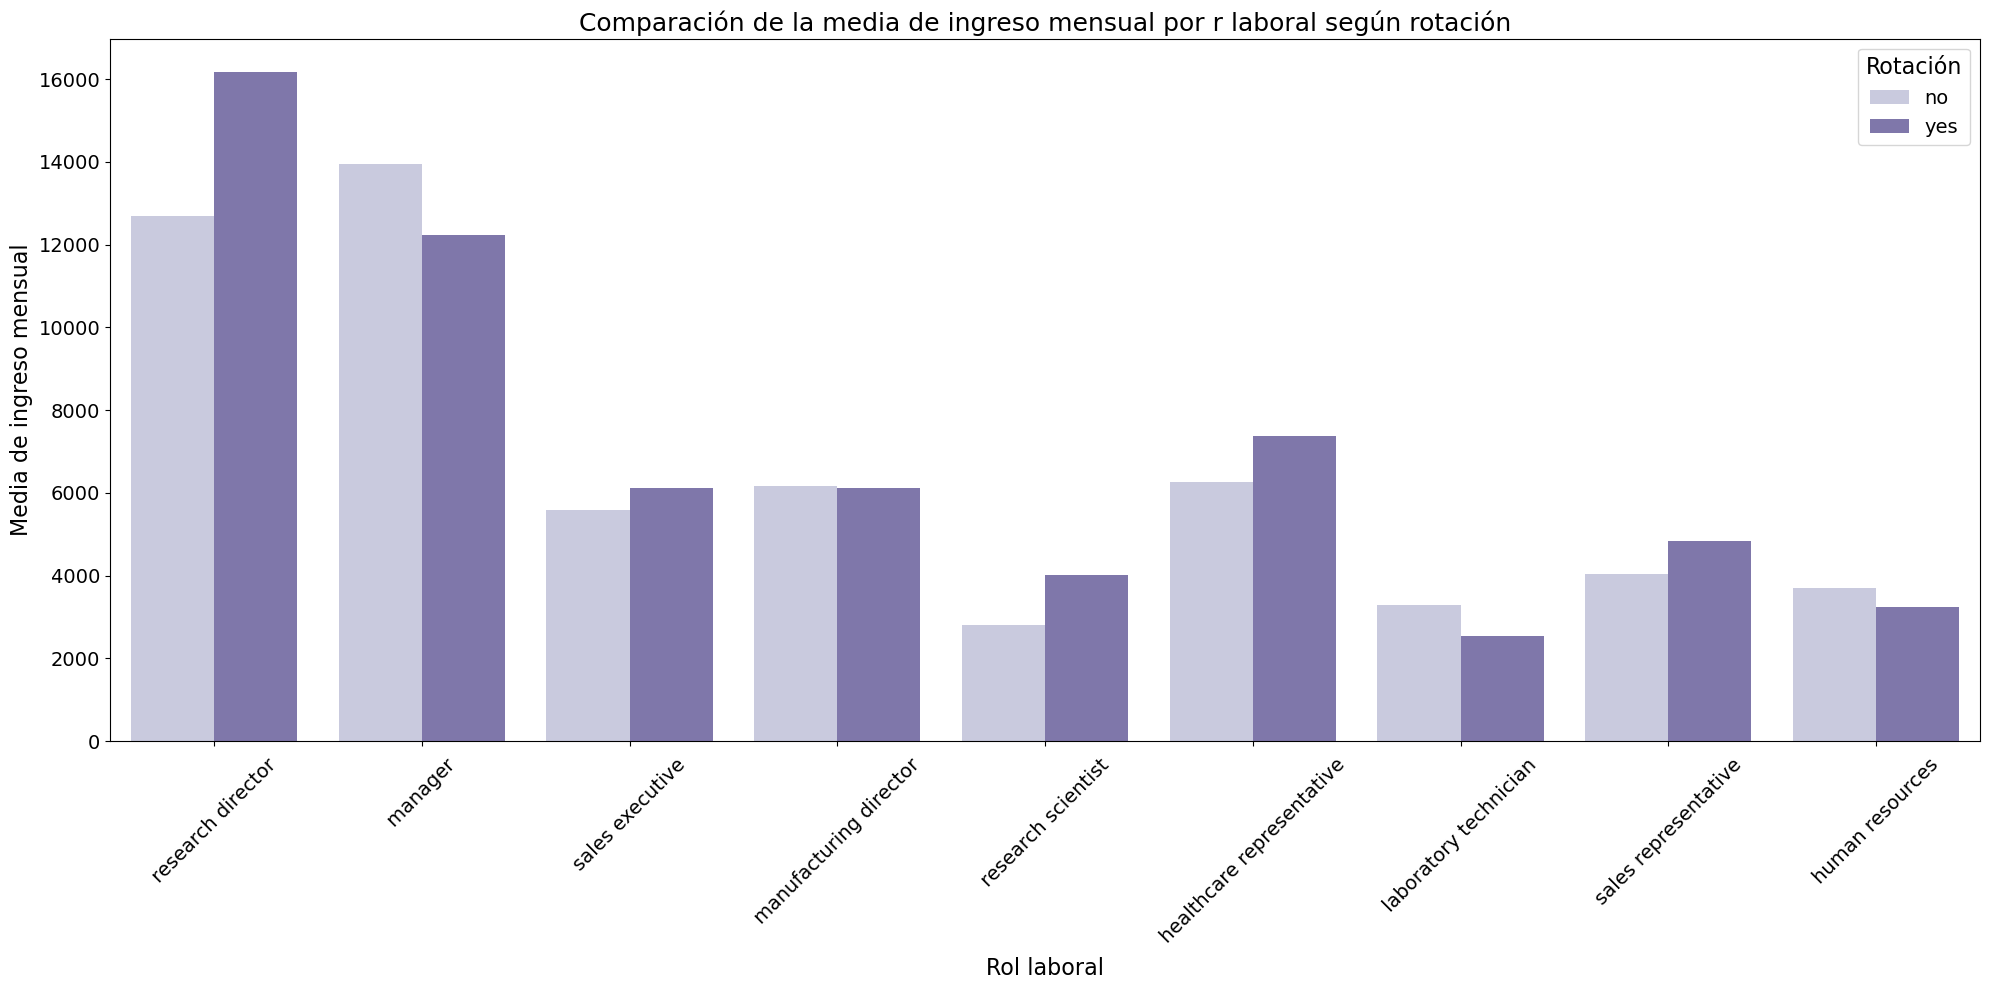

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y tamaño de la figura
plt.figure(figsize=(20, 10))

# Gráfico de barras con una paleta de colores personalizada (más violetas y azules)
sns.barplot(
    x='jobrole', 
    y='monthlyincome', 
    hue='attrition', 
    data=df, 
    palette='Purples',
    ci=False  # Cambié la paleta a 'Purples' para usar tonos violetas
)

# Rotar las etiquetas del eje X y aumentar tamaño de las etiquetas
plt.xticks(rotation=45, fontsize=14)  # Aumento de tamaño de las etiquetas del eje X

# Aumentar tamaño de las etiquetas del eje Y
plt.yticks(fontsize=14)  # Aumento de tamaño de las etiquetas del eje Y

# Añadir etiqueta al eje Y con mayor tamaño de fuente
plt.ylabel('Media de ingreso mensual', fontsize=16)
plt.xlabel('Rol laboral', fontsize=16)
# Título del gráfico con mayor tamaño de fuente
plt.title('Comparación de la media de ingreso mensual por r laboral según rotación', fontsize=18)

# Leyenda con mayor tamaño de fuente
plt.legend(title="Rotación", fontsize=14, title_fontsize=16)

# Ajustar el gráfico para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Grafico: 

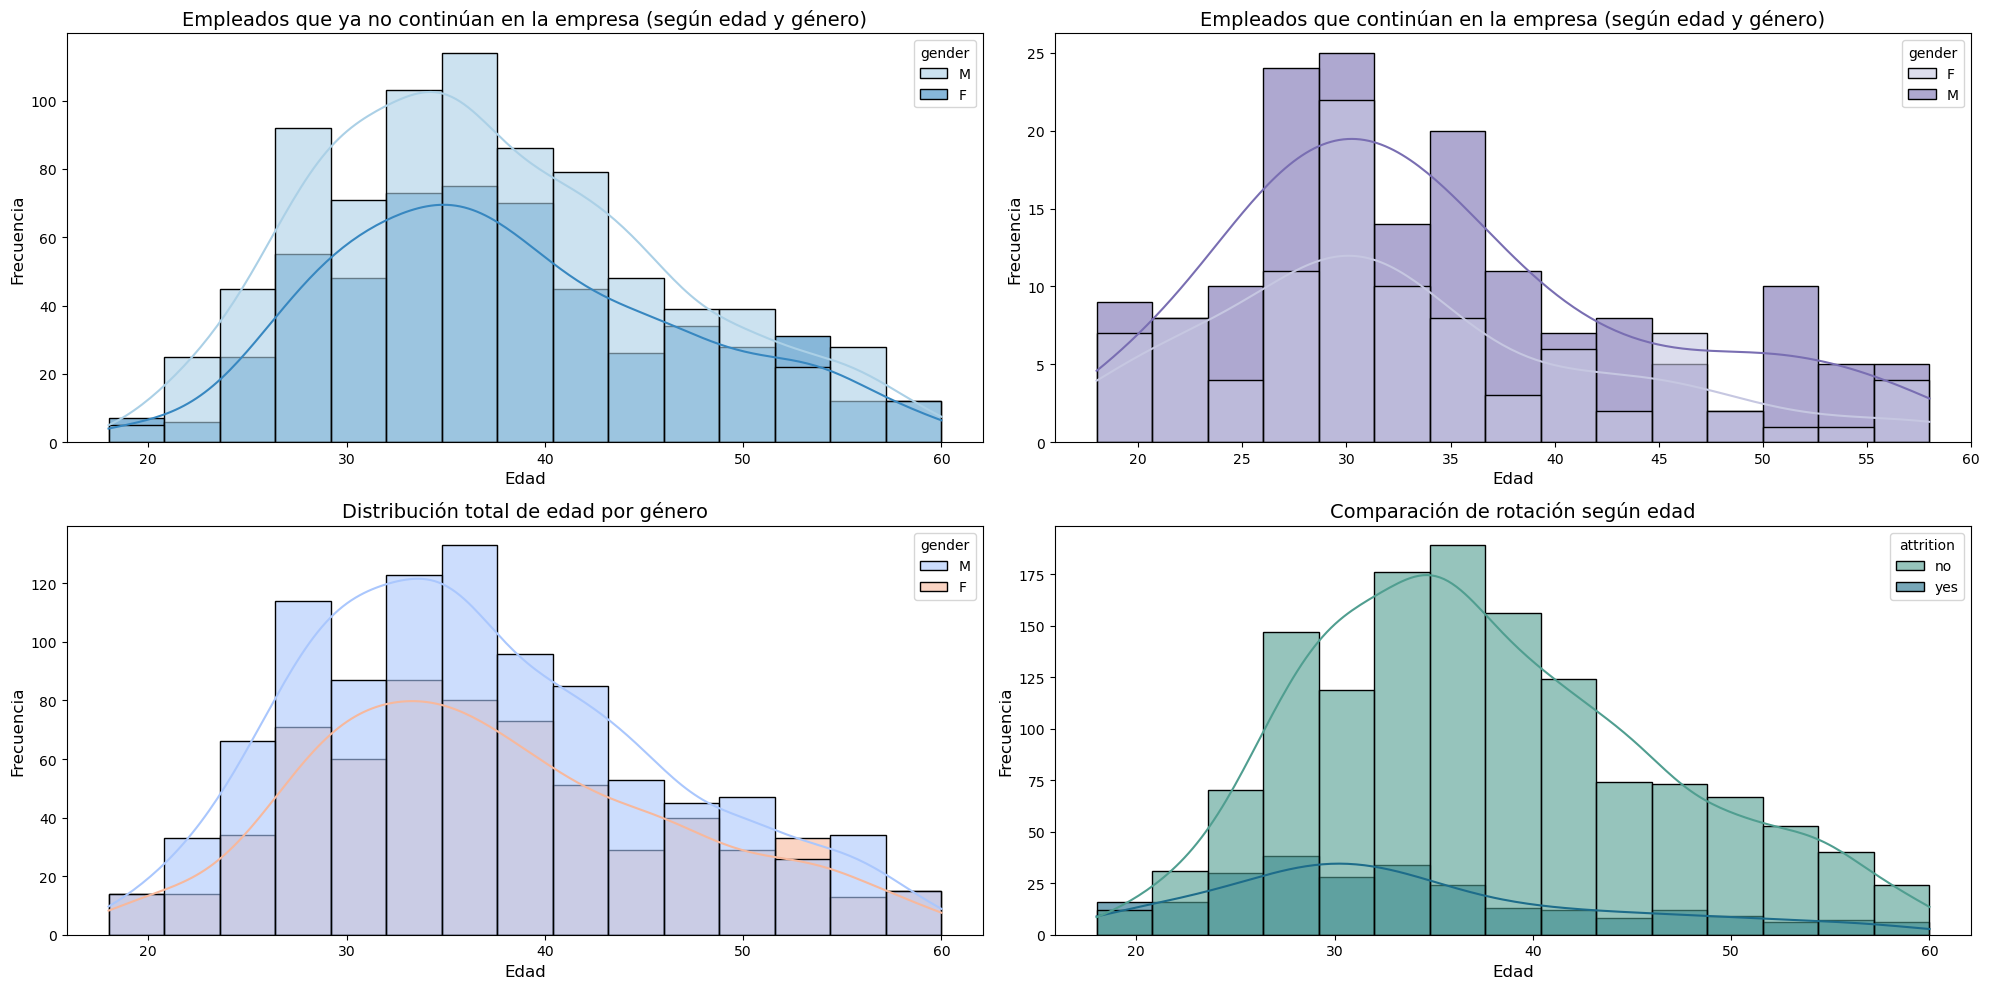

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subgráficos
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Filtrar los datos para quienes se fueron y quienes se quedaron
age_attrition_no = df[df['attrition'] == 'no']
age_attrition_yes = df[df['attrition'] == 'yes']

# Gráfico 1: Personal que ha dejado la empresa según edad y género
sns.histplot(
    data=age_attrition_no, 
    x='age', 
    bins=15,  # Aumento los bins para mayor detalle
    kde=True, 
    hue='gender', 
    ax=axes[0, 0], 
    palette='Blues',  # Paleta de tonos azules
    alpha=0.6
)
axes[0, 0].set_title("Empleados que ya no continúan en la empresa (según edad y género)", fontsize=14)
axes[0, 0].set_xlabel("Edad", fontsize=12)
axes[0, 0].set_ylabel("Frecuencia", fontsize=12)

# Gráfico 2: Personal que permanece en la empresa según edad y género
sns.histplot(
    data=age_attrition_yes, 
    x='age', 
    bins=15, 
    kde=True, 
    hue='gender', 
    ax=axes[0, 1], 
    palette='Purples',  # Paleta de tonos morados
    alpha=0.6
)
axes[0, 1].set_title("Empleados que continúan en la empresa (según edad y género)", fontsize=14)
axes[0, 1].set_xlabel("Edad", fontsize=12)
axes[0, 1].set_ylabel("Frecuencia", fontsize=12)

# Gráfico 3: Distribución total de edad por género
sns.histplot(
    data=df, 
    x='age', 
    bins=15, 
    kde=True, 
    hue='gender', 
    ax=axes[1, 0], 
    palette='coolwarm',  # Paleta cálida y fría
    alpha=0.6
)
axes[1, 0].set_title("Distribución total de edad por género", fontsize=14)
axes[1, 0].set_xlabel("Edad", fontsize=12)
axes[1, 0].set_ylabel("Frecuencia", fontsize=12)

# Gráfico 4: Personal que ha dejado o permanece en la empresa según edad
sns.histplot(
    data=df, 
    x='age', 
    bins=15, 
    kde=True, 
    hue='attrition',  # Mostrar la comparación de attrition (si se fue o no)
    ax=axes[1, 1], 
    palette='crest',  # Paleta de colores más cálida y atractiva
    alpha=0.6
)
axes[1, 1].set_title("Comparación de rotación según edad", fontsize=14)
axes[1, 1].set_xlabel("Edad", fontsize=12)
axes[1, 1].set_ylabel("Frecuencia", fontsize=12)

# Ajustar el diseño para evitar el solapamiento de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [98]:
## Calculamos salario medio: 

In [129]:
df.groupby('environmentsatisfaction')['salary'].mean() 

environmentsatisfaction
1    65618.014050
2    60969.003438
3    69571.407273
4    66102.162069
Name: salary, dtype: float64

In [130]:
normalidad(df,'environmentsatisfaction')

Para la columna environmentsatisfaction los datos no siguen una distribución normal.


In [131]:
grupocontrol = df[df['attrition'] == 'yes']['environmentsatisfaction']
grupotest = df[df['attrition'] == 'no']['environmentsatisfaction']

In [132]:
## Los datos No son normales > entonces hacemos Mann whitney: 

mannwhitneyu(grupocontrol,grupotest)

MannwhitneyuResult(statistic=172698.0, pvalue=0.291561744745232)

In [133]:
_, p_value_salary = mannwhitneyu(grupocontrol,grupotest) 

In [134]:
p_value_salary

0.291561744745232

In [135]:
p_value_salary < 0.05

False

In [ ]:
# si p_value < 0.05 -> existe una diferencia significativa 
# si p_value > 0.05 -> no hay diferencia significativa

In [ ]:
## Conclusión: No se puede afirmar que exista una diferencia estadísticamente significativa.

In [ ]:

sns.histplot(data = grupo_a, x = "salary", hue = "attrition", kde = True, color= "blue")
plt.title("Relación salarios anuales y tasa de rotación")
plt.xlabel("Salario")
plt.ylabel("Rotación")

sns.histplot(data = grupo_b, x = "salary", hue = "attrition", kde = True, color= "blue")
plt.title("Salario según rotación")
plt.xlabel("Salario")
plt.ylabel("Rotación")

### GÉNERO VS SATISFACCIÓN

In [ ]:
df['gender'].value_counts()

gender
M    971
F    643
Name: count, dtype: int64

In [ ]:
pd.crosstab(grupo_a['jobsatisfaction'], grupo_a['gender'])

gender,F,M
jobsatisfaction,,
3,198,283
4,185,329


In [ ]:
#GENERO VS SATISFACCION 

pd.crosstab(grupo_b['jobsatisfaction'], grupo_b['gender'])

gender,F,M
jobsatisfaction,,
1,130,187
2,130,172


In [ ]:
contingency_table_genero = pd.crosstab(df['jobsatisfaction'],df['gender'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table_genero)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("")
    print("Hay una diferencia significativa entre ambos grupos.")
    print("")
    print("""Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa entre ambos grupos.")
    print("Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas")

0.1715517080906658
No hay evidencia de una diferencia significativa entre ambos grupos.
Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas


#### Gráfico: relacion satisfaccion y genero 

/tmp/ipykernel_14776/3456380356.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x="jobsatisfaction", hue="gender", data=df, dodge=True, palette=buhu_palette)


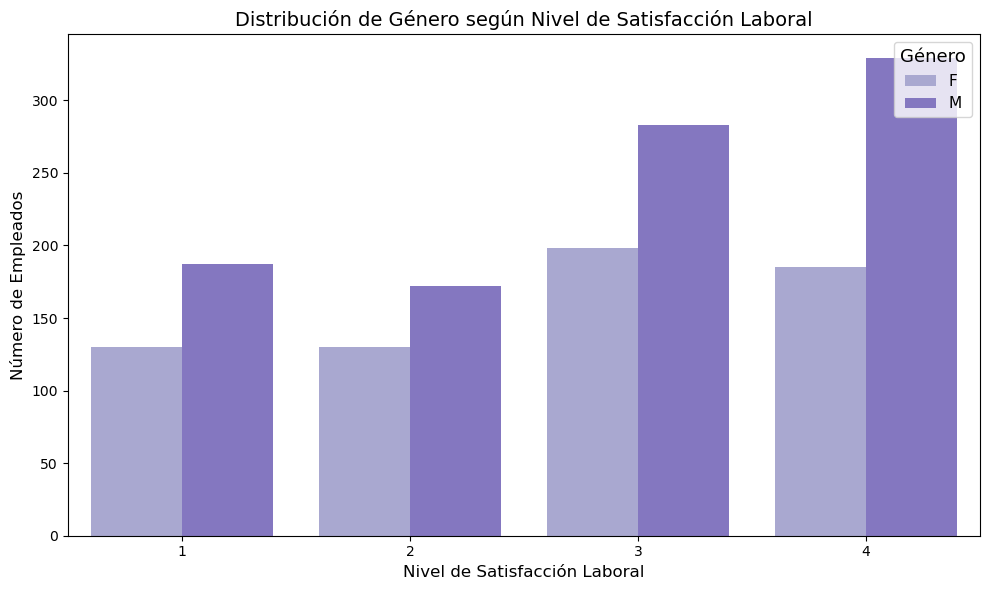

In [168]:
buhu_palette = ["#A3A1D7", "#7C6BCC", "#6A3D9A", "#5A2E8C", "#9F4CC7"]
plt.figure(figsize=(10, 6))

# Crear el countplot con mejoras
sns.countplot(x="jobsatisfaction", hue="gender", data=df, dodge=True, palette=buhu_palette)

# Añadir título y etiquetas con un formato mejorado
plt.title("Distribución de Género según Nivel de Satisfacción Laboral", fontsize=14)
plt.xlabel("Nivel de Satisfacción Laboral", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)


# Mejorar la leyenda
plt.legend(title="Género", title_fontsize='13', loc='upper right', fontsize=11)

# Ajustar el espaciado de los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
## Analisis del gráfico: 

### YEARS AT COMPANY VS SATISFACTION

In [ ]:
pd.crosstab(df['jobsatisfaction'], df['yearsatcompany']) ## Crosstable

yearsatcompany,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,36,37,40
jobsatisfaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12,31,21,32,29,40,13,28,14,19,24,3,2,8,4,6,2,1,6,3,4,4,1,0,2,1,2,0,1,0,1,0,0,1,2,0,0
2,5,39,23,25,21,39,14,15,29,20,20,11,2,6,1,3,3,1,0,3,4,2,6,0,2,2,1,0,1,0,1,1,2,0,0,0,0
3,16,48,48,45,32,67,15,29,45,17,40,7,4,5,5,6,5,4,5,5,14,3,6,2,0,0,0,3,0,1,1,0,2,0,0,1,0
4,11,53,49,39,32,62,36,43,18,38,49,15,7,7,9,6,4,3,4,1,7,5,4,0,3,2,1,0,0,0,0,2,1,0,1,0,2


In [ ]:
normalidad(df,'yearsatcompany')

Para la columna yearsatcompany los datos no siguen una distribución normal.


In [ ]:
grupocontrol_yac = df[df['jobsatisfaction'] >= 3]['yearsatcompany']
grupotest_yac = df[df['jobsatisfaction'] < 3]['yearsatcompany']

In [ ]:
_, p_value_yac = mannwhitneyu(grupocontrol_yac,grupotest_yac)

In [ ]:
p_value_yac < 0.05

False

In [ ]:
## Conclusión: No se puede afirmar que exista una diferencia estadísticamente significativa.

### Gráfico 6: 

In [ ]:
## Analizamos los niveles de educacion: 

In [162]:
df_education = df.groupby('education')['employeenumber'].count().reset_index()

In [163]:
df_education

,education,employeenumber
0,1,180
1,2,314
2,3,621
3,4,445
4,5,54


In [ ]:
pd.crosstab(df['jobsatisfaction'],df['stockoptionlevel'])

stockoptionlevel,0,1,2,3
jobsatisfaction,,,,
1,134,136,28,19
2,130,123,31,18
3,210,199,50,22
4,213,208,63,30


In [ ]:
normalidad(df, 'stockoptionlevel')

Para la columna stockoptionlevel los datos no siguen una distribución normal.


In [ ]:
grupo1 = df[df['jobsatisfaction'] >= 3]['stockoptionlevel']
grupo2 = df[df['jobsatisfaction'] < 3]['stockoptionlevel']

In [ ]:
_, p_value_1 = mannwhitneyu(grupo1,grupo2)

In [ ]:
p_value_1 < 0.05

False

In [ ]:
contingency_table_enviroment = pd.crosstab(df['jobsatisfaction'],df['stockoptionlevel'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table_enviroment)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("")
    print("Hay una diferencia significativa entre ambos grupos.")
    print("")
    print("""Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa entre ambos grupos.")
    print("Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas")

0.9096276830404566
No hay evidencia de una diferencia significativa entre ambos grupos.
Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas


In [ ]:
### FIN PRUEBAS. 

In [ ]:
##Graficos adicionales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition                 1614 non-null   object 
 1   businesstravel            1614 non-null   object 
 2   department                1614 non-null   object 
 3   educationfield            1614 non-null   object 
 4   gender                    1614 non-null   object 
 5   jobrole                   1614 non-null   object 
 6   overtime                  938 non-null    object 
 7   remotework                1614 non-null   object 
 8   age                       1614 non-null   int64  
 9   distancefromhome          1614 non-null   int64  
 10  education                 1614 non-null   int64  
 11  employeenumber            1614 non-null   int64  
 12  environmentsatisfaction   1614 non-null   int64  
 13  jobinvolvement            1614 non-null   int64  
 14  joblevel     

## Exploración general: 

#### Gráfico de rol laboral: 

/tmp/ipykernel_14776/1723458122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


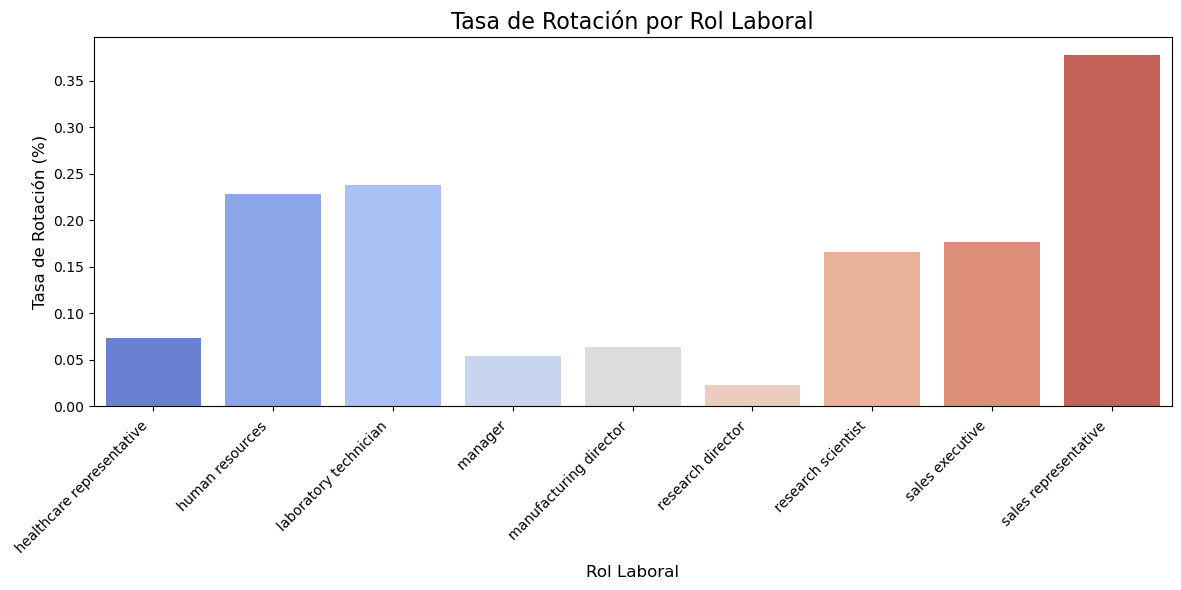

/tmp/ipykernel_14776/1723458122.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


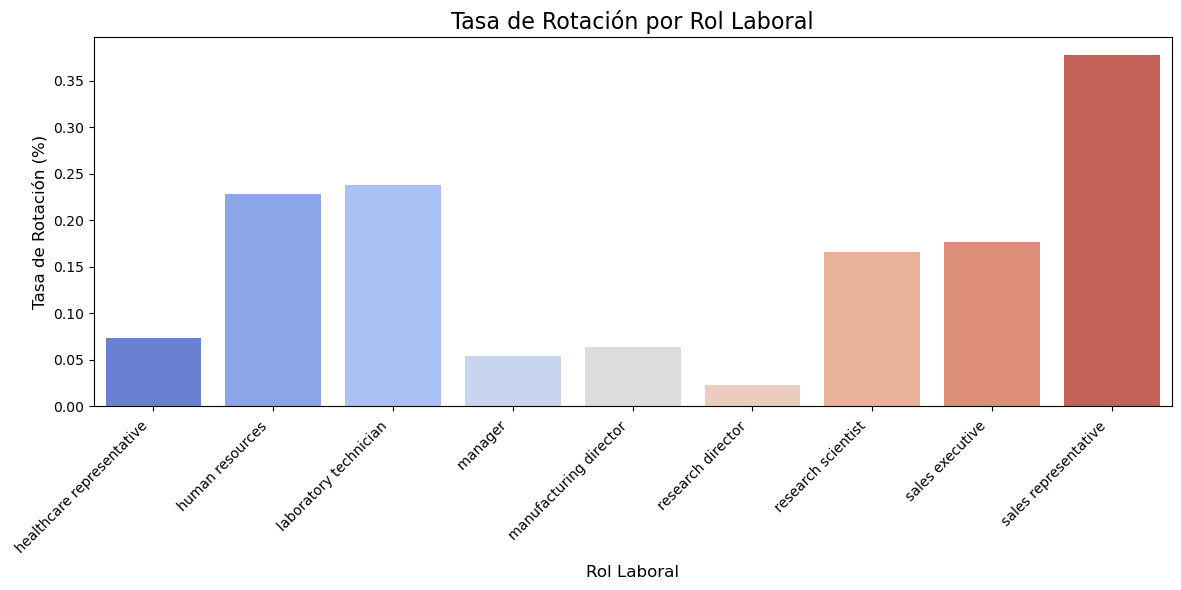

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la tasa de rotación por rol laboral
attrition_rate_by_jobrole = df.groupby("jobrole")["attrition"].value_counts(normalize=True).unstack().fillna(0)
attrition_rate_by_jobrole = attrition_rate_by_jobrole["yes"]  # Tomamos solo la tasa de 'yes'

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

sns.barplot(
    x=attrition_rate_by_jobrole.index,  # Los roles laborales
    y=attrition_rate_by_jobrole.values,  # Las tasas de rotación
    palette="coolwarm"
)

# Personalización del gráfico
plt.title("Tasa de Rotación por Rol Laboral", fontsize=16)
plt.xlabel("Rol Laboral", fontsize=12)
plt.ylabel("Tasa de Rotación (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la tasa de rotación por rol laboral
attrition_rate_by_jobrole = df.groupby("jobrole")["attrition"].value_counts(normalize=True).unstack().fillna(0)
attrition_rate_by_jobrole = attrition_rate_by_jobrole["yes"]  # Tomamos solo la tasa de 'yes'

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

sns.barplot(
    x=attrition_rate_by_jobrole.index,  # Los roles laborales
    y=attrition_rate_by_jobrole.values,  # Las tasas de rotación
    palette="coolwarm"
)

# Personalización del gráfico
plt.title("Tasa de Rotación por Rol Laboral", fontsize=16)
plt.xlabel("Rol Laboral", fontsize=12)
plt.ylabel("Tasa de Rotación (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()


/tmp/ipykernel_25855/2605322453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grupo", y="valores", data=abandono_grupo_a, palette="mako");


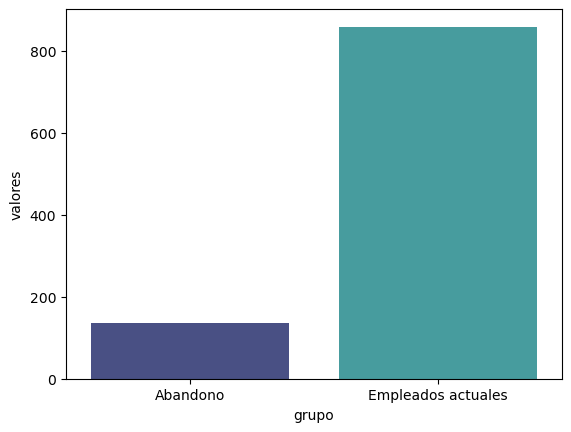

In [ ]:
sns.barplot(x="grupo", y="valores", data=abandono_grupo_a, palette="mako");

In [ ]:
## Chequeamos tasa de abandono en relación al género (empleados satisfechos)

<Axes: xlabel='gender', ylabel='Count'>

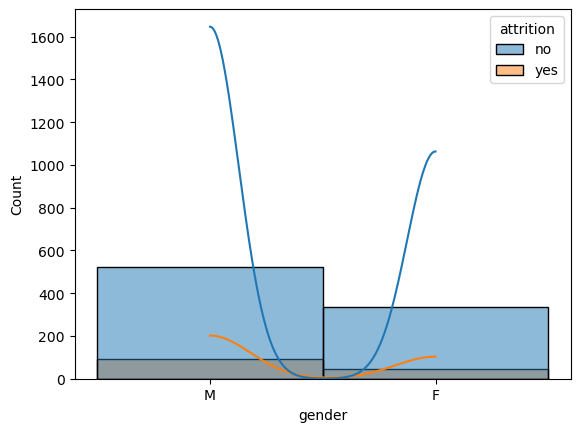

In [ ]:
sns.histplot(data = grupo_a, x = "gender", hue = "attrition", kde = True, color= "blue")
# plt.title("Género según rotación")
# plt.xlabel("Género")
# plt.ylabel("Frecuencia")

In [ ]:
pd.crosstab(grupo_a["attrition"], grupo_a["gender"], normalize="columns")*100 ## porcentaje de abandono por género

gender,F,M
attrition,,
no,87.989556,85.294118
yes,12.010444,14.705882


In [ ]:
## Función para ver si los datos son normales: 

def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [ ]:
normalidad(grupo_a, 'age')

Para la columna age los datos no siguen una distribución normal.


<Axes: xlabel='salary', ylabel='attrition'>

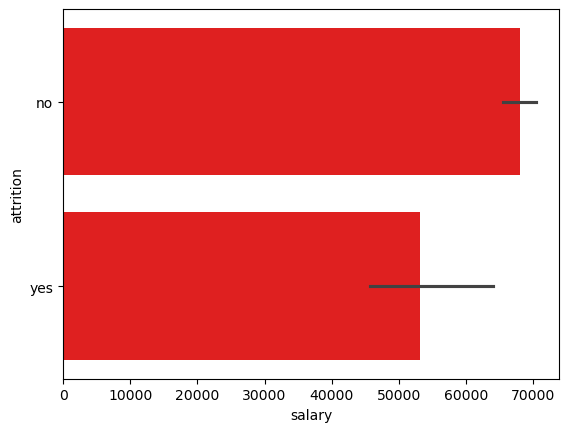

In [ ]:
sns.barplot(data = df, x = "salary", y="attrition", color= "red")

In [ ]:
normalidad(df,"salary")

Para la columna salary los datos no siguen una distribución normal.


In [ ]:
mannwhitneyu()